In [1]:
import pandas as pd
import pylab as plt
%matplotlib inline
import numpy as np
import math

df=pd.read_csv('data/train.csv', sep=',')

from featureEngineering import feature_engineering_test, feature_engineering_train

title_mapping, cabin_mapping, embarked_mapping = feature_engineering_train(df)

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
df['Sex+Age'] = df['Age_s']+df['Sex_']
df['Pclass+Fare'] = df['Pclass_s']+df['Fare_s']

(array([  15.,  226.,  132.,  111.,   31.,   32.,   92.,   41.,   17.,  194.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

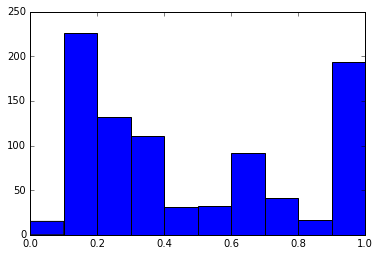

In [3]:
plt.hist(df['Fare_s'])

(array([  17.,   13.,    9.,   36.,   42.,   16.,   67.,   33.,   27.,
          18.,   14.,   12.,    6.,    4.,    0.,   23.,    9.,    7.,
          50.,   72.,   43.,  157.,   62.,   45.,   57.,    0.,   20.,
          10.,   11.,   11.]),
 array([ 0.        ,  0.06666667,  0.13333333,  0.2       ,  0.26666667,
         0.33333333,  0.4       ,  0.46666667,  0.53333333,  0.6       ,
         0.66666667,  0.73333333,  0.8       ,  0.86666667,  0.93333333,
         1.        ,  1.06666667,  1.13333333,  1.2       ,  1.26666667,
         1.33333333,  1.4       ,  1.46666667,  1.53333333,  1.6       ,
         1.66666667,  1.73333333,  1.8       ,  1.86666667,  1.93333333,  2.        ]),
 <a list of 30 Patch objects>)

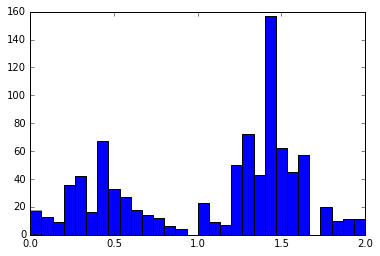

In [4]:
plt.hist(df['Sex+Age'], 30)

(array([  40.,    0.,   22.,    0.,   16.,    0.,   86.,    0.,  114.,
           0.,   59.,    0.,  224.,    0.,   95.,    0.,   72.,    0.,
          48.,    0.,   41.,    0.,   32.,    0.,   16.,    0.,   15.,
           0.,    4.,    7.]),
 array([ 0.        ,  0.03333333,  0.06666667,  0.1       ,  0.13333333,
         0.16666667,  0.2       ,  0.23333333,  0.26666667,  0.3       ,
         0.33333333,  0.36666667,  0.4       ,  0.43333333,  0.46666667,
         0.5       ,  0.53333333,  0.56666667,  0.6       ,  0.63333333,
         0.66666667,  0.7       ,  0.73333333,  0.76666667,  0.8       ,
         0.83333333,  0.86666667,  0.9       ,  0.93333333,  0.96666667,  1.        ]),
 <a list of 30 Patch objects>)

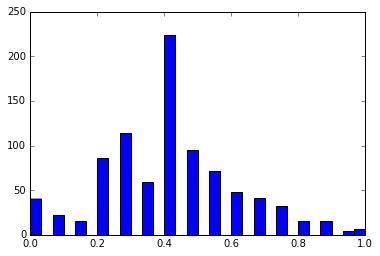

In [5]:
plt.hist(df['Age_s'], 30)

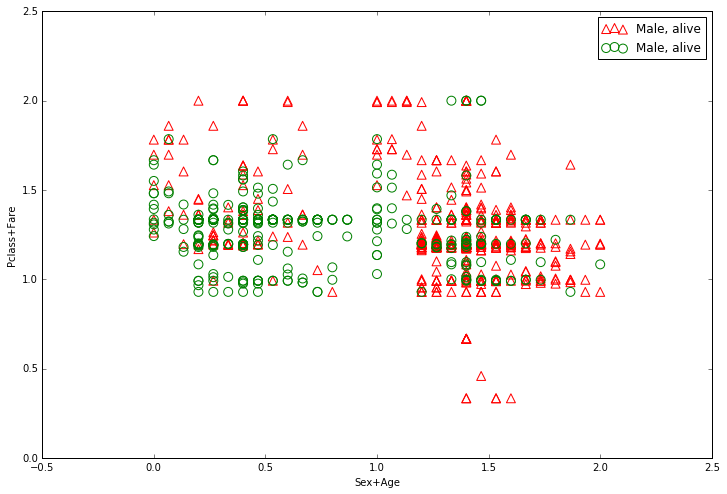

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(df[df['Survived']==0]['Sex+Age'], df[df['Survived']==0]['Pclass+Fare'], 
            marker='^', s=80,facecolors='none', edgecolors='r', label='Male, alive')
plt.scatter(df[df['Survived']==1]['Sex+Age'], df[df['Survived']==1]['Pclass+Fare'], 
            marker='o', s=80,facecolors='none', edgecolors='g', label='Male, alive')
plt.legend(loc='upper right')
plt.xlabel('Sex+Age')
plt.ylabel('Pclass+Fare')

## Split and scale the data

In [7]:
from sklearn.cross_validation import train_test_split

X = df[['Sex+Age', 'Pclass+Fare']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

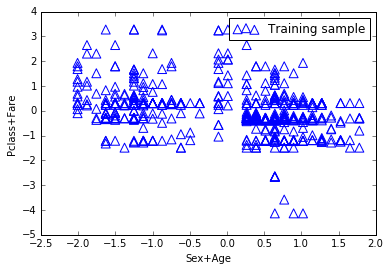

In [9]:
#plt.figure(figsize=(10,7))
plt.scatter(X_train_std[:,0], X_train_std[:,1], 
            marker='^', s=80,facecolors='none', edgecolors='b', label='Training sample')
plt.legend(loc='upper right')
plt.xlabel('Sex+Age')
plt.ylabel('Pclass+Fare')

## Train a perceptron model

In [10]:
from sklearn.linear_model import Perceptron

In [11]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [12]:
y_pred = ppn.predict(X_test_std)
print('Missclassified samples: %d' % (y_test != y_pred).sum())

Missclassified samples: 112


In [13]:
1 - float((y_test != y_pred).sum())/len(y_test)

0.582089552238806

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy on test: %.3f' % accuracy_score(y_test,y_pred))
print('Accuracy on train: %.3f' % accuracy_score(y_train,ppn.predict(X_train_std)))
print('Precison on test: %.3f' % precision_score(y_test,y_pred))
print('Recall on test: %.3f' % recall_score(y_test,y_pred))
print('F1 on test: %.3f' % f1_score(y_test,y_pred))

Accuracy on test: 0.582
Accuracy on train: 0.596
Precison on test: 0.519
Recall on test: 0.348
F1 on test: 0.417


## Plot the predictions

In [15]:
from matplotlib.colors import ListedColormap

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, 
                         test_idx=None, resolution=0.02):
    markers = ('x', 'o','^','s','v')
    colors = ('red', 'lightblue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.figure(figsize=(10,7))
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
                            
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx), s=70,
                    marker=markers[idx], label=cl)
        
    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]      
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]     
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', 
                alpha=1.0, linewidth=1, marker='s', 
                s=80, label='test set')

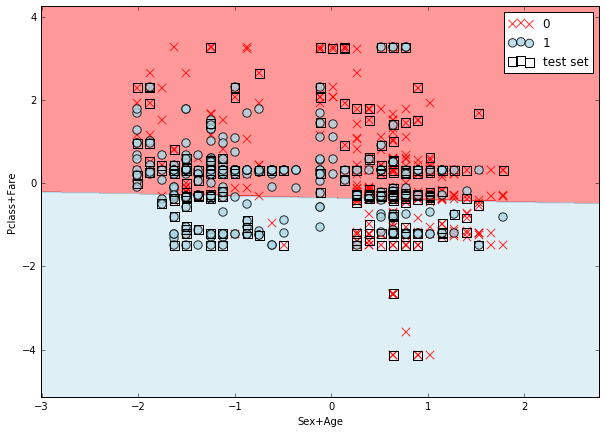

In [16]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, ppn,test_idx=range(len(y_combined)-len(y_test), len(y_combined)))
plt.legend()
plt.xlabel('Sex+Age')
plt.ylabel('Pclass+Fare')

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = lr.predict(X_test_std)
print('Accuracy on test: %.3f' % accuracy_score(y_test,y_pred))
print('Accuracy on train: %.3f' % accuracy_score(y_train,lr.predict(X_train_std)))
print('Precison on test: %.3f' % precision_score(y_test,y_pred))
print('Recall on test: %.3f' % recall_score(y_test,y_pred))
print('F1 on test: %.3f' % f1_score(y_test,y_pred))

Accuracy on test: 0.761
Accuracy on train: 0.796
Precison on test: 0.780
Recall on test: 0.617
F1 on test: 0.689


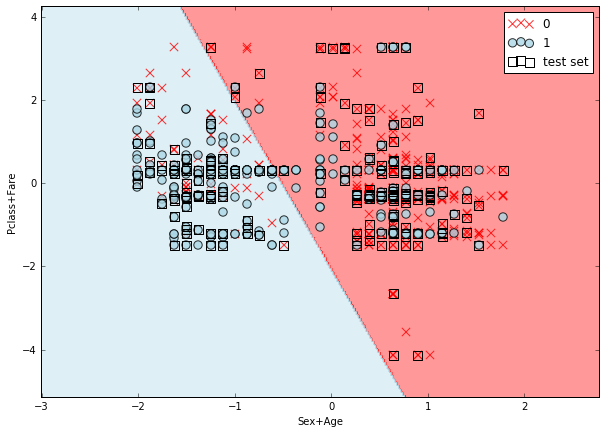

In [19]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, lr,test_idx=range(len(y_combined)-len(y_test), len(y_combined)))
plt.legend()
plt.xlabel('Sex+Age')
plt.ylabel('Pclass+Fare')

## Support vector machines

In [20]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
y_pred = svm.predict(X_test_std)
print('Accuracy on test: %.3f' % accuracy_score(y_test,y_pred))
print('Accuracy on train: %.3f' % accuracy_score(y_train,svm.predict(X_train_std)))
print('Precison on test: %.3f' % precision_score(y_test,y_pred))
print('Recall on test: %.3f' % recall_score(y_test,y_pred))
print('F1 on test: %.3f' % f1_score(y_test,y_pred))

Accuracy on test: 0.757
Accuracy on train: 0.795
Precison on test: 0.760
Recall on test: 0.635
F1 on test: 0.692


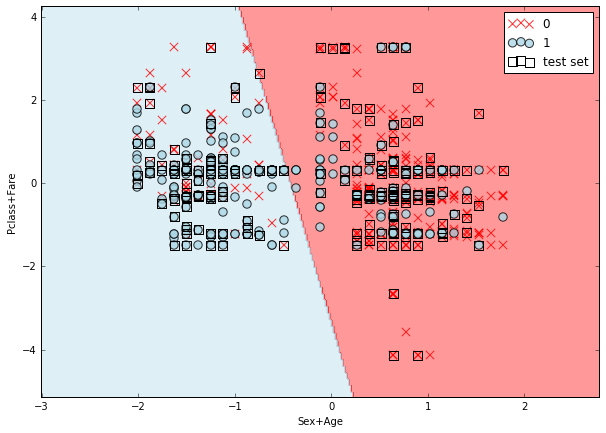

In [22]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, svm,test_idx=range(len(y_combined)-len(y_test), len(y_combined)))
plt.legend()
plt.xlabel('Sex+Age')
plt.ylabel('Pclass+Fare')

# Using the Kernel trik to find seperating hyperplanes in higher dimensional space 

## SVM - RBF - Radial Basis Function Kernel

### gamma=0.2

In [33]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2)

svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
y_pred = svm.predict(X_test_std)
print('Accuracy on test: %.3f' % accuracy_score(y_test,y_pred))
print('Accuracy on train: %.3f' % accuracy_score(y_train,svm.predict(X_train_std)))
print('Precison on test: %.3f' % precision_score(y_test,y_pred))
print('Recall on test: %.3f' % recall_score(y_test,y_pred))
print('F1 on test: %.3f' % f1_score(y_test,y_pred))

Accuracy on test: 0.776
Accuracy on train: 0.817
Precison on test: 0.809
Recall on test: 0.626
F1 on test: 0.706


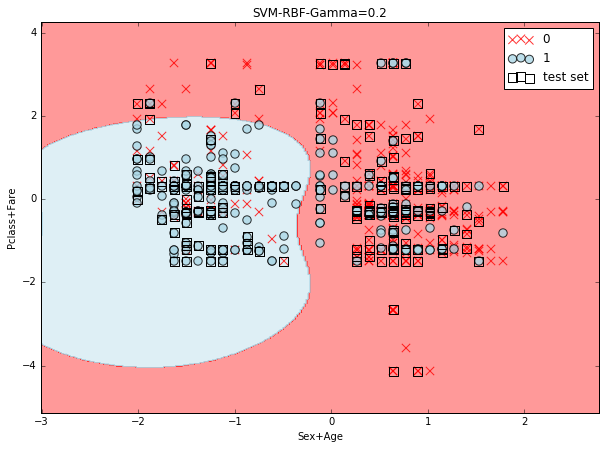

In [35]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, svm,test_idx=range(len(y_combined)-len(y_test), len(y_combined)))
plt.legend()
plt.xlabel('Sex+Age')
plt.ylabel('Pclass+Fare')
plt.title('SVM-RBF-Gamma=%.1f' % svm.gamma)

## Gamma = 100

In [26]:
svm = SVC(kernel='rbf', random_state=0, gamma=20)

svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=20, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
y_pred = svm.predict(X_test_std)
print('Accuracy on test: %.3f' % accuracy_score(y_test,y_pred))
print('Accuracy on train: %.3f' % accuracy_score(y_train,svm.predict(X_train_std)))
print('Precison on test: %.3f' % precision_score(y_test,y_pred))
print('Recall on test: %.3f' % recall_score(y_test,y_pred))
print('F1 on test: %.3f' % f1_score(y_test,y_pred))

Accuracy on test: 0.776
Accuracy on train: 0.868
Precison on test: 0.816
Recall on test: 0.617
F1 on test: 0.703


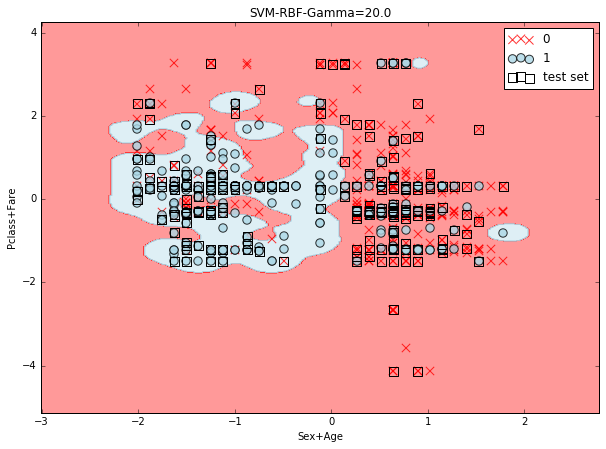

In [31]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, svm,test_idx=range(len(y_combined)-len(y_test), len(y_combined)))
plt.legend()
plt.xlabel('Sex+Age')
plt.ylabel('Pclass+Fare')
plt.title('SVM-RBF-Gamma=%.1f' % svm.gamma)

# This is really cool !

In [29]:
svm.gamma

20